<a href="https://colab.research.google.com/github/HuynhDuyNhan/AI/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

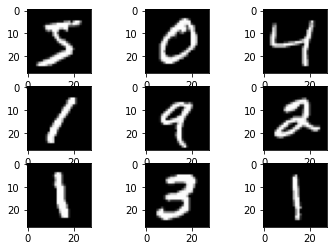

In [ ]:
for i in range (9):
  plt.subplot(330 +i +1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = x_train.reshape(60000,784) 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train =np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
375/375 [==============================] - 7s 17ms/step - loss: 0.1042 - accuracy: 0.9676 - val_loss: 0.0970 - val_accuracy: 0.9710
Epoch 2/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0962 - val_accuracy: 0.9727
Epoch 3/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0581 - accuracy: 0.9822 - val_loss: 0.0912 - val_accuracy: 0.9778
Epoch 4/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0931 - val_accuracy: 0.9773
Epoch 5/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.1095 - val_accuracy: 0.9767
Epoch 6/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.1055 - val_accuracy: 0.9786
Epoch 7/500
375/375 [==============================] - 6s 16ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.1051 - val_accuracy:

Test loss:  0.24820183217525482
Test accuracy:  0.9836000204086304


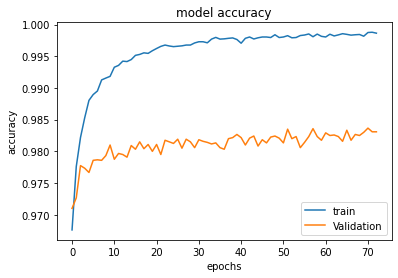

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('mnist.ipynb')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-04-30 17:10:41--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-04-30 17:10:42 (25.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/mnist.ipynb to pdf
[NbConvertApp] Support files will be in mnist_files/
[NbConvertApp] Making directory ./mnist_files
[NbConvertApp] Making directory ./mnist_files
[NbConvertApp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'